**Task 3**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys

os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

**Load the Data**

In [2]:
# Load the dataset
data = pd.read_csv('../data/data.csv')

# Display the first few rows to inspect the data
print(data.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

In [3]:
data_path = os.path.join(rpath,'data','data.csv')
data = pd.read_csv(data_path)
data['TransactionStartTime']=pd.to_datetime(data['TransactionStartTime'], format='mixed')
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


**Feature Creation**

In [4]:
# Aggregate features for each customer
customer_features = data.groupby('CustomerId').agg({
    'Amount': ['sum', 'mean', 'count'],
    'TransactionStartTime': ['min', 'max']
}).reset_index()

# Rename the columns for clarity
customer_features.columns = ['CustomerId', 'TotalAmount', 'AvgAmount', 'TransactionCount', 'FirstTransaction', 'LastTransaction']

# Calculate transaction duration (days between first and last transaction)
customer_features['TransactionDuration'] = (pd.to_datetime(customer_features['LastTransaction']) - pd.to_datetime(customer_features['FirstTransaction'])).dt.days

# Show the newly created features
print(customer_features.head())

        CustomerId  TotalAmount     AvgAmount  TransactionCount  \
0     CustomerId_1     -10000.0 -10000.000000                 1   
1    CustomerId_10     -10000.0 -10000.000000                 1   
2  CustomerId_1001      20000.0   4000.000000                 5   
3  CustomerId_1002       4225.0    384.090909                11   
4  CustomerId_1003      20000.0   3333.333333                 6   

           FirstTransaction           LastTransaction  TransactionDuration  
0 2018-11-21 16:49:14+00:00 2018-11-21 16:49:14+00:00                    0  
1 2018-11-21 16:49:09+00:00 2018-11-21 16:49:09+00:00                    0  
2 2018-11-16 07:53:19+00:00 2018-11-16 08:20:39+00:00                    0  
3 2018-11-15 18:50:09+00:00 2019-01-18 10:05:00+00:00                   63  
4 2019-02-01 14:58:07+00:00 2019-02-01 15:04:51+00:00                    0  


In [5]:
customer_aggregates = data.groupby('CustomerId').agg(
    TotalTransactionAmount=('Amount', 'sum'),
    AverageTransactionAmount=('Amount', 'mean'),
    TransactionCount=('TransactionId', 'count'),
    TransactionAmountStdDev=('Amount', 'std'),
    MinTransactionAmount=('Amount', 'min'),
    MaxTransactionAmount=('Amount', 'max'),
    FirstTransactionDate=('TransactionStartTime', 'min'),
    LastTransactionDate=('TransactionStartTime', 'max')
).reset_index()
customer_aggregates

,CustomerId,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,TransactionAmountStdDev,MinTransactionAmount,MaxTransactionAmount,FirstTransactionDate,LastTransactionDate
0,CustomerId_1,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,2018-11-21 16:49:14+00:00,2018-11-21 16:49:14+00:00
1,CustomerId_10,-10000.0,-10000.000000,1,NaN,-10000.0,-10000.0,2018-11-21 16:49:09+00:00,2018-11-21 16:49:09+00:00
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333,-5000.0,10000.0,2018-11-16 07:53:19+00:00,2018-11-16 08:20:39+00:00
3,CustomerId_1002,4225.0,384.090909,11,560.498966,-75.0,1500.0,2018-11-15 18:50:09+00:00,2019-01-18 10:05:00+00:00
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146,-5000.0,10000.0,2019-02-01 14:58:07+00:00,2019-02-01 15:04:51+00:00
...,...,...,...,...,...,...,...,...,...
3737,CustomerId_992,20000.0,3333.333333,6,6088.240030,-5000.0,10000.0,2019-02-08 10:23:23+00:00,2019-02-08 10:27:42+00:00
3738,CustomerId_993,20000.0,4000.000000,5,6745.368782,-5000.0,10000.0,2019-01-18 15:51:50+00:00,2019-01-18 15:56:30+00:00
3739,CustomerId_994,543873.0,5384.881188,101,14800.656784,-5000.0,90000.0,2018-11-15 18:37:07+00:00,2019-02-12 11:17:08+00:00
3740,CustomerId_996,139000.0,8176.470588,17,4433.329648,-5000.0,10000.0,2018-12-07 14:37:54+00:00,2018-12-07 15:24:31+00:00


**Extract Temporal Features**

In [7]:
# Convert 'TransactionStartTime' to datetime format
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

# Extract temporal features
data['TransactionHour'] = data['TransactionStartTime'].dt.hour
data['TransactionDay'] = data['TransactionStartTime'].dt.day
data['TransactionMonth'] = data['TransactionStartTime'].dt.month
data['TransactionYear'] = data['TransactionStartTime'].dt.year


# Display the first few rows with the new temporal features
print(data[['TransactionHour', 'TransactionDay', 'TransactionMonth', 'TransactionYear']].head())

   TransactionHour  TransactionDay  TransactionMonth  TransactionYear
0                2              15                11             2018
1                2              15                11             2018
2                2              15                11             2018
3                3              15                11             2018
4                3              15                11             2018


In [8]:
data['Date']=data['TransactionStartTime'].dt.date
data['Date']=pd.to_datetime(data['Date'])
data['dy']=data['TransactionStartTime'].dt.day
data['month']=data['TransactionStartTime'].dt.month
data['year']=data['TransactionStartTime'].dt.year
data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear,Date,dy,month,year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,2,15,11,2018,2018-11-15,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,2,15,11,2018,2018-11-15,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,0,2,15,11,2018,2018-11-15,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2,0,3,15,11,2018,2018-11-15,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,3,15,11,2018,2018-11-15,15,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,9,13,2,2019,2019-02-13,13,2,2019
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,9,13,2,2019,2019-02-13,13,2,2019
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,9,13,2,2019,2019-02-13,13,2,2019
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,...,2,0,10,13,2,2019,2019-02-13,13,2,2019


**Categorical Encoding**

In [9]:
# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=['ProductCategory', 'ProviderId', 'ChannelId'], drop_first=True)

# Display the encoded data
print(data_encoded.head())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode     ProductId   Amount  Value  \
0  CustomerId_4406          UGX          256  ProductId_10   1000.0   1000   
1  CustomerId_4406          UGX          256   ProductId_6    -20.0     20   
2  CustomerId_4683          UGX          256   ProductId_1    500.0    500   
3   CustomerId_988          UGX          256  ProductId_21  20000.0  21800   
4   CustomerId_988          UGX          256   ProductId_6   -644.0    644   

   ... ProductCategory_tv  ProductCategory_utility_bill 

In [10]:
from sklearn.preprocessing import LabelEncoder

# Example categorical column to label encode
label_encoder = LabelEncoder()

# Label encoding for the 'ProductCategory' column
data['ProductCategory_Encoded'] = label_encoder.fit_transform(data['ProductCategory'])
data['CurrencyCode_Encoded'] = label_encoder.fit_transform(data['CurrencyCode'])
data['ChannelId_Encoded'] = label_encoder.fit_transform(data['ChannelId'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

# Display the DataFrame with label-encoded column
data.head()

{'ChannelId_1': 0, 'ChannelId_2': 1, 'ChannelId_3': 2, 'ChannelId_5': 3}


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,TransactionDay,TransactionMonth,TransactionYear,Date,dy,month,year,ProductCategory_Encoded,CurrencyCode_Encoded,ChannelId_Encoded
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,15,11,2018,2018-11-15,15,11,2018,0,0,2
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,15,11,2018,2018-11-15,15,11,2018,2,0,1
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,15,11,2018,2018-11-15,15,11,2018,0,0,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,15,11,2018,2018-11-15,15,11,2018,8,0,2
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,15,11,2018,2018-11-15,15,11,2018,2,0,1


**Normalization**

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Example: Normalize the 'Amount' and 'Value' columns
scaler = MinMaxScaler()

# Fit and transform the data to [0, 1] range
data[['Amount_Normalized', 'Value_Normalized']] = scaler.fit_transform(data[['Amount', 'Value']])

# Display the normalized columns
data[['Amount_Normalized', 'Value_Normalized']].head()

,Amount_Normalized,Value_Normalized
0,0.092004,0.000101
1,0.091910,0.000002
2,0.091958,0.000050
3,0.093750,0.002206
4,0.091853,0.000065


In [12]:
data_path = os.path.join(rpath,'data','processed_data.csv')
data.to_csv(data_path,index=False)

**Handling Missing Values**

In [13]:
# Impute missing values for numerical columns with mean
data['Amount'].fillna(data['Amount'].mean(), inplace=True)

# Impute missing values for categorical columns with mode
data['ProductCategory'].fillna(data['ProductCategory'].mode()[0], inplace=True)

# Check for missing values to ensure they have been handled
print(data.isnull().sum())

TransactionId              0
BatchId                    0
AccountId                  0
SubscriptionId             0
CustomerId                 0
CurrencyCode               0
CountryCode                0
ProviderId                 0
ProductId                  0
ProductCategory            0
ChannelId                  0
Amount                     0
Value                      0
TransactionStartTime       0
PricingStrategy            0
FraudResult                0
TransactionHour            0
TransactionDay             0
TransactionMonth           0
TransactionYear            0
Date                       0
dy                         0
month                      0
year                       0
ProductCategory_Encoded    0
CurrencyCode_Encoded       0
ChannelId_Encoded          0
Amount_Normalized          0
Value_Normalized           0
dtype: int64


C:\Users\neimn\AppData\Local\Temp\ipykernel_11692\2362676347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Amount'].fillna(data['Amount'].mean(), inplace=True)
C:\Users\neimn\AppData\Local\Temp\ipykernel_11692\2362676347.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

**Scaling Numerical Features**

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical columns
data[['Amount', 'Value']] = scaler.fit_transform(data[['Amount', 'Value']])

# Display the scaled data
print(data[['Amount', 'Value']].head())

     Amount     Value
0 -0.046371 -0.072291
1 -0.054643 -0.080251
2 -0.050426 -0.076352
3  0.107717  0.096648
4 -0.059704 -0.075183


**Create a default estimator and apply WoE binning**

In [15]:
# Calculate Recency (days since last transaction)
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
last_transaction = data.groupby('CustomerId')['TransactionStartTime'].max()
recency = (data['TransactionStartTime'].max() - last_transaction).dt.days

# Calculate Frequency (number of transactions)
frequency = data.groupby('CustomerId')['TransactionId'].count()

# Calculate Monetary (total amount spent)
monetary = data.groupby('CustomerId')['Amount'].sum()

# Calculate Stability (could be standard deviation of transaction amounts)
stability = data.groupby('CustomerId')['Amount'].std().fillna(0)

# Combine these into a new DataFrame
rfms = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary, 'Stability': stability})

# Preview the RFMS features
rfms.head()

,Recency,Frequency,Monetary,Stability
CustomerId,,,,
CustomerId_1,83,1,-0.135580,0.000000
CustomerId_10,83,1,-0.135580,0.000000
CustomerId_1001,89,5,-0.110207,0.053193
CustomerId_1002,25,11,-0.565027,0.004546
CustomerId_1003,11,6,-0.164688,0.048907


**Visualization**

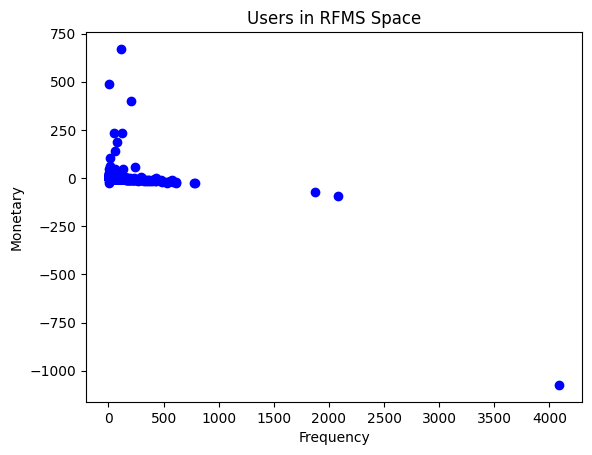

In [16]:
plt.scatter(rfms['Frequency'], rfms['Monetary'], c='blue', label='Users')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Users in RFMS Space')
plt.show()

In [17]:
# Example thresholds for classification
rfms['Label'] = 'Good'
rfms.loc[(rfms['Recency'] > 30) | (rfms['Frequency'] < 5) | (rfms['Monetary'] < 100), 'Label'] = 'Bad'

# Preview the labeled data
rfms.head()

,Recency,Frequency,Monetary,Stability,Label
CustomerId,,,,,
CustomerId_1,83,1,-0.135580,0.000000,Bad
CustomerId_10,83,1,-0.135580,0.000000,Bad
CustomerId_1001,89,5,-0.110207,0.053193,Bad
CustomerId_1002,25,11,-0.565027,0.004546,Bad
CustomerId_1003,11,6,-0.164688,0.048907,Bad


**Perform Weight of Evidence (WoE) Binning**

In [18]:
# Convert 'Label' column to binary values
rfms['Label'] = rfms['Label'].map({'Good': 0, 'Bad': 1})

In [19]:
def woe_binning(data, target, feature, bins=10):
    # Bin the continuous variable
    data['bin'] = pd.cut(data[feature], bins=bins)

    # Calculate the WoE for each bin
    binned = data.groupby('bin')[target].agg(['count', 'sum'])
    binned['good'] = binned['count'] - binned['sum']

    # Avoid division by zero by replacing zeros in 'good' or 'sum' with a small value (epsilon)
    epsilon = 0.0001
    binned['sum'] = binned['sum'].replace(0, epsilon)
    binned['good'] = binned['good'].replace(0, epsilon)

    # Calculate WoE
    binned['woe'] = np.log((binned['sum'] / binned['sum'].sum()) / (binned['good'] / binned['good'].sum()))

    return binned

# Example of applying WoE binning to Recency
woe_result = woe_binning(rfms, target='Label', feature='Recency')
print(woe_result)

              count   sum    good       woe
bin                                        
(-0.09, 9.0]   1214  1210  4.0000 -0.721813
(9.0, 18.0]     468   467  1.0000 -0.287565
(18.0, 27.0]    314   313  1.0000 -0.687691
(27.0, 36.0]    337   337  0.0001  8.596529
(36.0, 45.0]    232   232  0.0001  8.223183
(45.0, 54.0]    345   345  0.0001  8.619990
(54.0, 63.0]    255   255  0.0001  8.317709
(63.0, 72.0]    188   188  0.0001  8.012888
(72.0, 81.0]    170   170  0.0001  7.912244
(81.0, 90.0]    219   219  0.0001  8.165517


C:\Users\neimn\AppData\Local\Temp\ipykernel_11692\1577808939.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = data.groupby('bin')[target].agg(['count', 'sum'])
